# Project_Team_ID:- PTID-CDS-MAY-23-1529

# Walking_&_Running_Classification_Code:-(PRCP 1013)

# Context:-

## This dataset contains accelerometer and gyroscope data associated when a person is running and walking. The target is to create a LSTM model to predict the state of body from input of sensor. We have created a model that predicts if a person is walking or running based on the data from accelerometer and gyroscope from both left and right direction. 

## The dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope. `

## This data set contains 88588 user records and 11 columns, 44365 running  and 44223 walking records. In the dataset the column named Activity is used to divide groups into walking  or running.





 
# Domain Analysis:-
### Acceleration
Acceleration (a) is the change in velocity (Δv) over the change in time (Δt), represented by the equation a = Δv/Δt. This allows you to measure how fast velocity changes in meters per second squared (m/s^2). Acceleration is also a vector quantity, so it includes both magnitude and direction
The X axis is parallel with the device's screen, aligned with the top and bottom edges, in the left-right direction. The Y axis is parallel with the device's screen, aligned with the left and right edges, in the top-bottom direction. The Z axis is perpendicular to the device's screen, pointing up.

  Time :- When activity starts.



 Username :- Name of the User.


 Wrist :- wrist" refers to the hand on which the device was worn while recording, it can take only two values i.e., 0 for "left" and 1 for "right".

 Activity :- "activity" refers to the physical activity being performed during recording, 0 for "walk" and 1 for "run".
 
### Gyroscope
A gyroscope measures the rate at which a device rotates around a spatial axis.Devices have a three-axis gyroscope, which delivers rotation values in each of the three axes shown in Rotation values are measured in radians per second around the given axis. Rotation values may be positive or negative depending on the direction of rotation.The gyroscope measures rotation around the x, y, and z axes.

## Business Problem:-
 This dataset is used to identify whether a user is walking or running

## Import all Important Libraries:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPClassifier
import math
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('walkrun.csv')

#### Import the CSV file of Walk & Run classification.

In [5]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


#### Here we access the first 5 rows to see dataset for futher process.

In [6]:
data.shape

(88588, 11)

#### In this dataset , there are 88588 Rows and 11 Columns

## Basic Checks:-

In [7]:
data.username.unique()

array(['viktor'], dtype=object)

#### The datseta contains information about a user named Vicktor.

In [8]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

#### For this dataset this is the target variable . In which there is no imbalance in data present.

In [9]:
data.wrist.unique()

array([0, 1], dtype=int64)

#### "wrist " shows in which hand the user has wear the sensors.

In [10]:
data.username.value_counts()

viktor    88588
Name: username, dtype: int64

In [11]:
data.columns.values

array(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype=object)

#### In this we retrieve the columns information.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


#### It basically gives all the information about the dataset whether it has the null value and the object type.

## Checking the Statistical Details:-

In [13]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


#### It gives us the Statistical knowledge what our data has like Mean, Median, Standard Deviation, Total Nos. of data present etc.

# Data Cleaning:-

In [14]:
data.drop(columns=['date', 'time'],inplace=True)

#### For this dataset we dont need of Date and time.

In [15]:
data = data.drop_duplicates()
print(data.shape)

(88588, 9)


#### In this there is no duplicate values present.

## Checking for Missing Values:-

In [16]:
data.isnull().sum()

username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

#### No Null values are presents.

In [17]:
accel =[]
def accleration(x,y,z):

    s=(x*x)+(y*y)+(z*z)
    acceleration=y=(math.sqrt(s))
    accel.append(acceleration)

#### This function is used to calculate acceleration from acceleration coordinates.

In [18]:
result = [accleration(x, y,z) for x, y ,z in zip(data['acceleration_x'], data['acceleration_y'],data['acceleration_z'])]

#### It goes throuh all the rows in the coloumn and get x,y,z acceleration coordinates

In [19]:
data["acceleration"]=""

#### Now create a new coloumn to store acceleration values.

In [20]:
data['acceleration']=pd.Series(accel)

#### Now we store values.

In [21]:
data

,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,acceleration
0,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...,...,...
88583,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


# Data Visualization:-

## Univariate Analysis:-

In [ ]:
!pip install sweetviz
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

#### wrist:#0 :left :right more of the people wear the band on the right hand

#### acceleration_x: most of the values are concentrated b/w -1 and 1

#### acceleration_y: most of the values are concentrated b/w -1.5to 0 than it increases slowly and then decreases.

#### acceleration_z:values in increses from -2 to 0 and then suddenly dips to 1

#### gyro_x:most of the values are b/w -4 to 4

#### gyro_y:most of the values are b/w -4 to 4

#### gyro_z:most of the values are b/w -5 to 5

<Axes: xlabel='activity', ylabel='acceleration'>

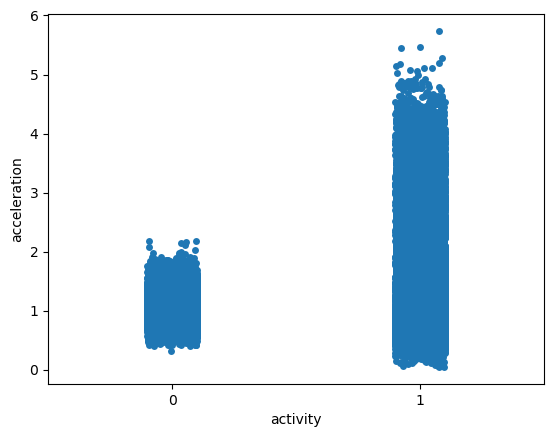

In [20]:
sns.stripplot(x="activity", y="acceleration", data=data)

#### Plotting acceleration to activity we can find that the acceleration is high in  activity 1 and we can determine activity 1 is running as the accleration is high.the maximum acceleration while walking is 2 and while running is 6.

In [21]:
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

Text(0.5, 0, 'count')

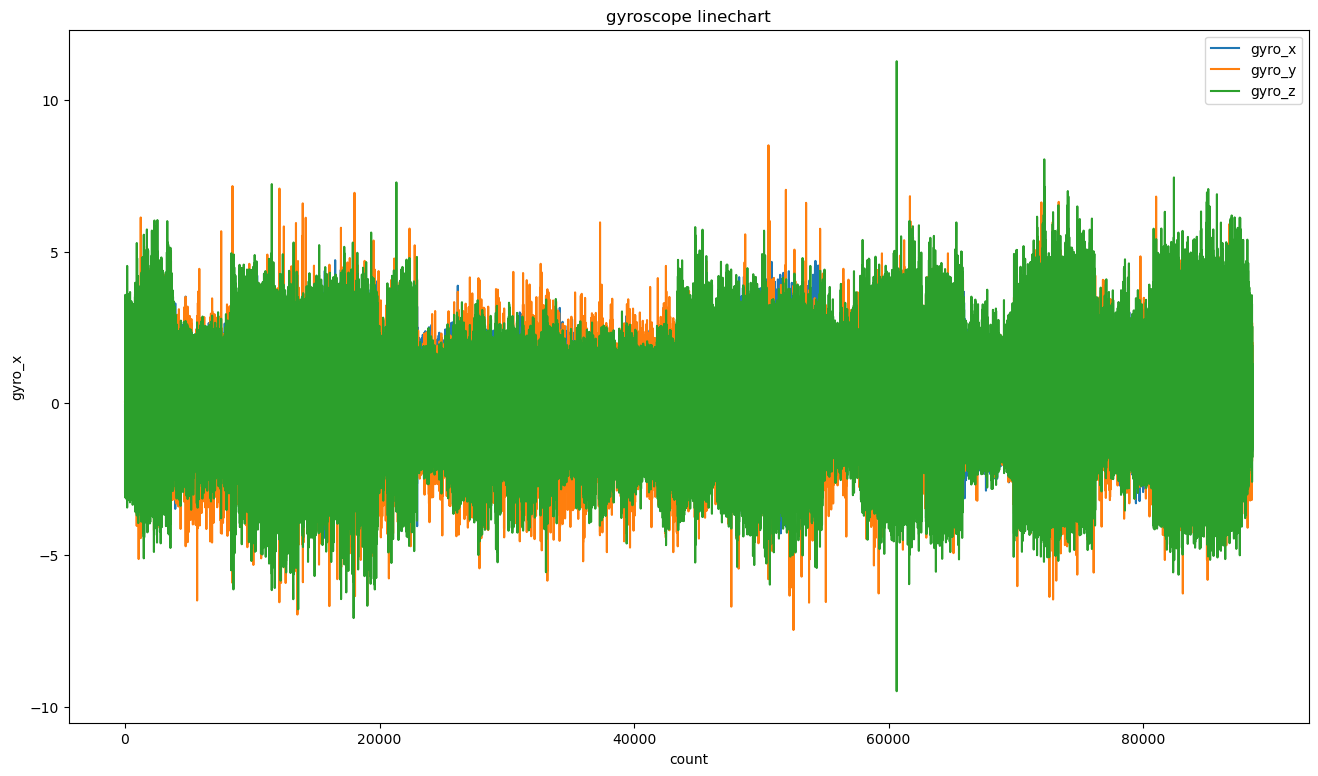

In [22]:
# Create a plot
my_figsize = (16, 9)
plt.figure(figsize=my_figsize)

plt.title('gyroscope linechart')
sns.lineplot(data=data['gyro_x'], label='gyro_x')
sns.lineplot(data=data['gyro_y'], label='gyro_y')
sns.lineplot(data=data['gyro_z'], label='gyro_z')
plt.xlabel("count")

#### Gyroscope values are all over the place.

In [ ]:
# Create a plot
my_figsize = (16, 9)
plt.figure(figsize=my_figsize)

plt.title('Accelaration linechart')
sns.lineplot(data=data['acceleration_x'], label='acceleration_x')
sns.lineplot(data=data['acceleration_y'], label='acceleration_y')
sns.lineplot(data=data['acceleration_z'], label='acceleration_z')
plt.xlabel("count")

#### There is a high rate of change in x followed by  y and z.There is possibility that the spike in data is  while running and while walking there is less spike.

In [24]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

<Axes: xlabel='wrist', ylabel='count'>

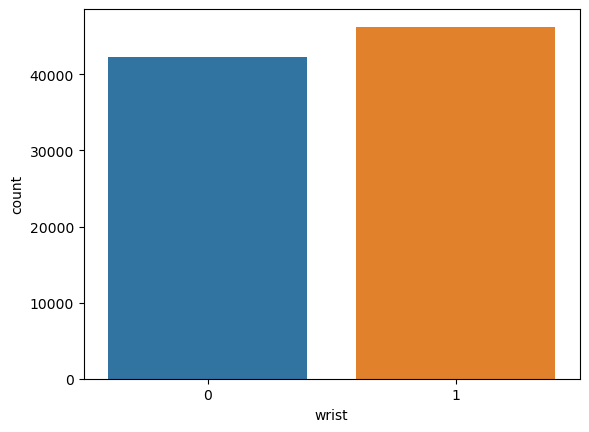

In [25]:
sns.countplot(x='wrist', data=data)

#### 0 : Left
#### 1 : Right
#### Most of the people wear the band on the right hand.

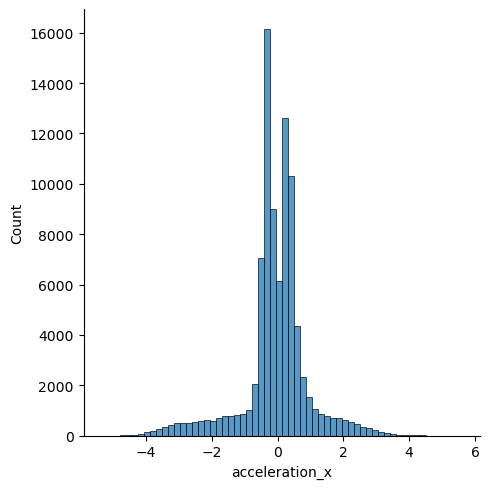

In [26]:
sns.displot(data['acceleration_x'],bins=60)

#### Most of the values are concentrated b/w -1 and 1

In [27]:
data.acceleration_x.describe()

count    88588.000000
mean        -0.074811
std          1.009299
min         -5.350500
25%         -0.381800
50%         -0.059500
75%          0.355500
max          5.603300
Name: acceleration_x, dtype: float64

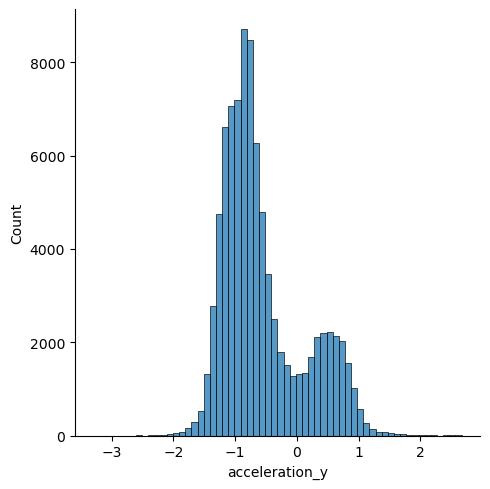

In [28]:
sns.displot(data['acceleration_y'],bins=60);

#### Most of the values are concentrated b/w -1.5to 0 than in increases slowly and then decreases.

In [29]:
data.acceleration_y.describe()

count    88588.000000
mean        -0.562585
std          0.658458
min         -3.299000
25%         -1.033500
50%         -0.759100
75%         -0.241775
max          2.668000
Name: acceleration_y, dtype: float64

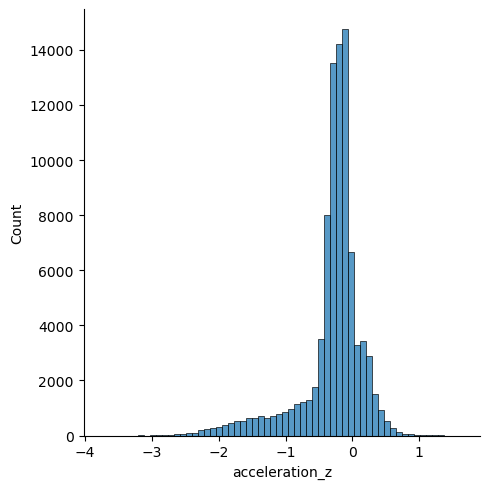

In [30]:
sns.displot(data['acceleration_z'],bins=60);

#### Values in increses from -2 to 0 and then suddenly dips to 1

In [31]:
data.acceleration_z.describe()

count    88588.000000
mean        -0.313956
std          0.486815
min         -3.753800
25%         -0.376000
50%         -0.221000
75%         -0.085900
max          1.640300
Name: acceleration_z, dtype: float64

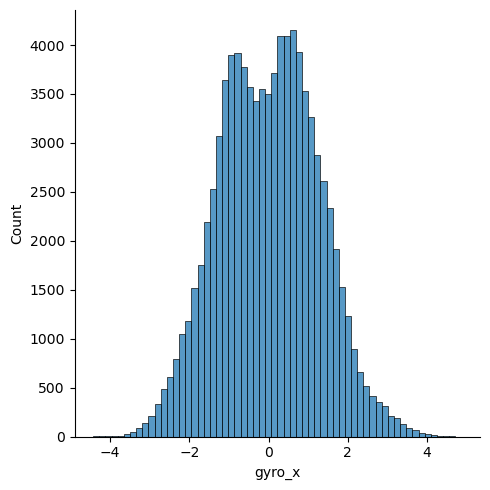

In [32]:
sns.displot(data['gyro_x'],bins=60);

#### Most of the values are b/w -4 to 4.

In [32]:
data.gyro_x.describe()

count    88588.000000
mean         0.004160
std          1.253423
min         -4.430600
25%         -0.920700
50%          0.018700
75%          0.888800
max          4.874200
Name: gyro_x, dtype: float64

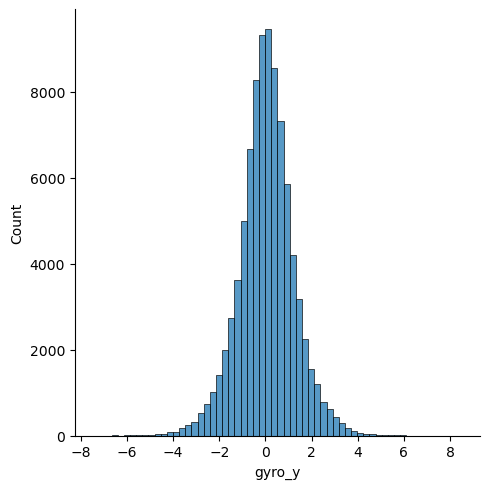

In [34]:
sns.displot(data['gyro_y'],bins=60);

#### Most of the values are b/w -4 to 4

In [35]:
data.gyro_y.describe()

count    88588.000000
mean         0.037203
std          1.198725
min         -7.464700
25%         -0.644825
50%          0.039300
75%          0.733700
max          8.498000
Name: gyro_y, dtype: float64

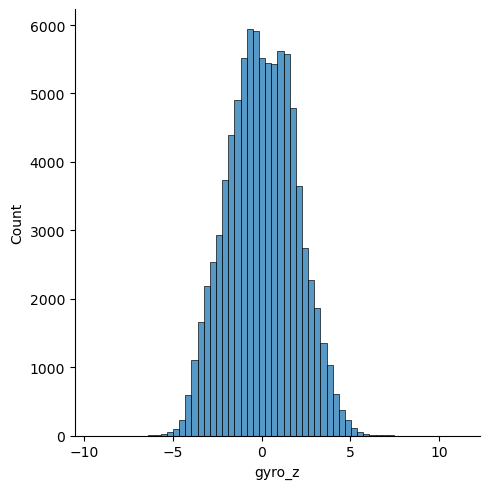

In [36]:
sns.displot(data['gyro_z'],bins=60);

#### Most of the values are b/w -5 to 5

In [37]:
data.gyro_z.describe()

count    88588.000000
mean         0.022327
std          1.914423
min         -9.480000
25%         -1.345125
50%          0.006900
75%          1.398200
max         11.266200
Name: gyro_z, dtype: float64

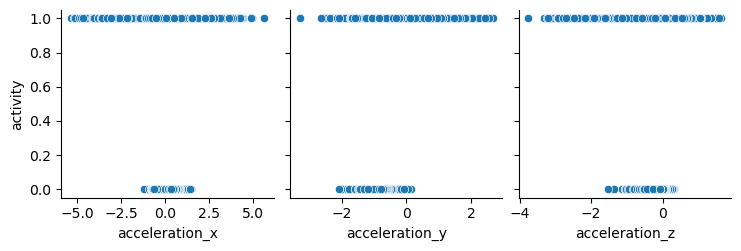

In [38]:
sns.pairplot(data=data,
                  y_vars=['activity'],
                  x_vars=['acceleration_x', 'acceleration_y', 'acceleration_z'])


#### If you look at 3 plots we can find that ,if x cordinate is more than +-1.5  then the user is running.  if y cordinate is less than -2.0  then the user is running or if >0 user. If z cordinate is less than -1.7  then the user is running or if >.2(approx).

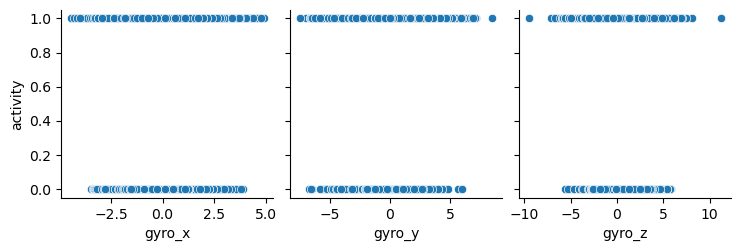

In [39]:
sns.pairplot(data=data,
                  y_vars=['activity'],
                  x_vars=['gyro_x', 'gyro_y', 'gyro_z'])

#### If you look at 3 plots we can find that compared to accelerometer values ,we cannot make such conclusions here because there is only a less difference b/w walking and running in x and y gyroscope values but in Z cordinate. If the value is +-5 the user is running.

## Bivariate Analysis:-

#### acceleration x :when the acceleration x is -1 to 1,it implies the user is walking and if b/w -4 to 4 the user is running

#### acceleration y :if the acceleration is b/w -2 t 0,the user is walking and if b/w -2 to 2 the user is running

#### acceleration z :if the acceleration is b/w -1 to 0,user is walking and if b/w 3 to 1 user is running

#### NOTE:there is no big no huge difference blw values in gyro compared to accelerometer

#### gyro x :if the gyro is b/w -3 t 3,the user is walking and if b/w -4 to 4 the user is running

#### gyro y :if the gyro is b/w -4 t 4,the user is walking and if b/w -6 to 6 the user is running

#### gyro z :if the gyro is b/w -5 t 5,the user is walking and if b/w -4.5 to 4.5 the user is running


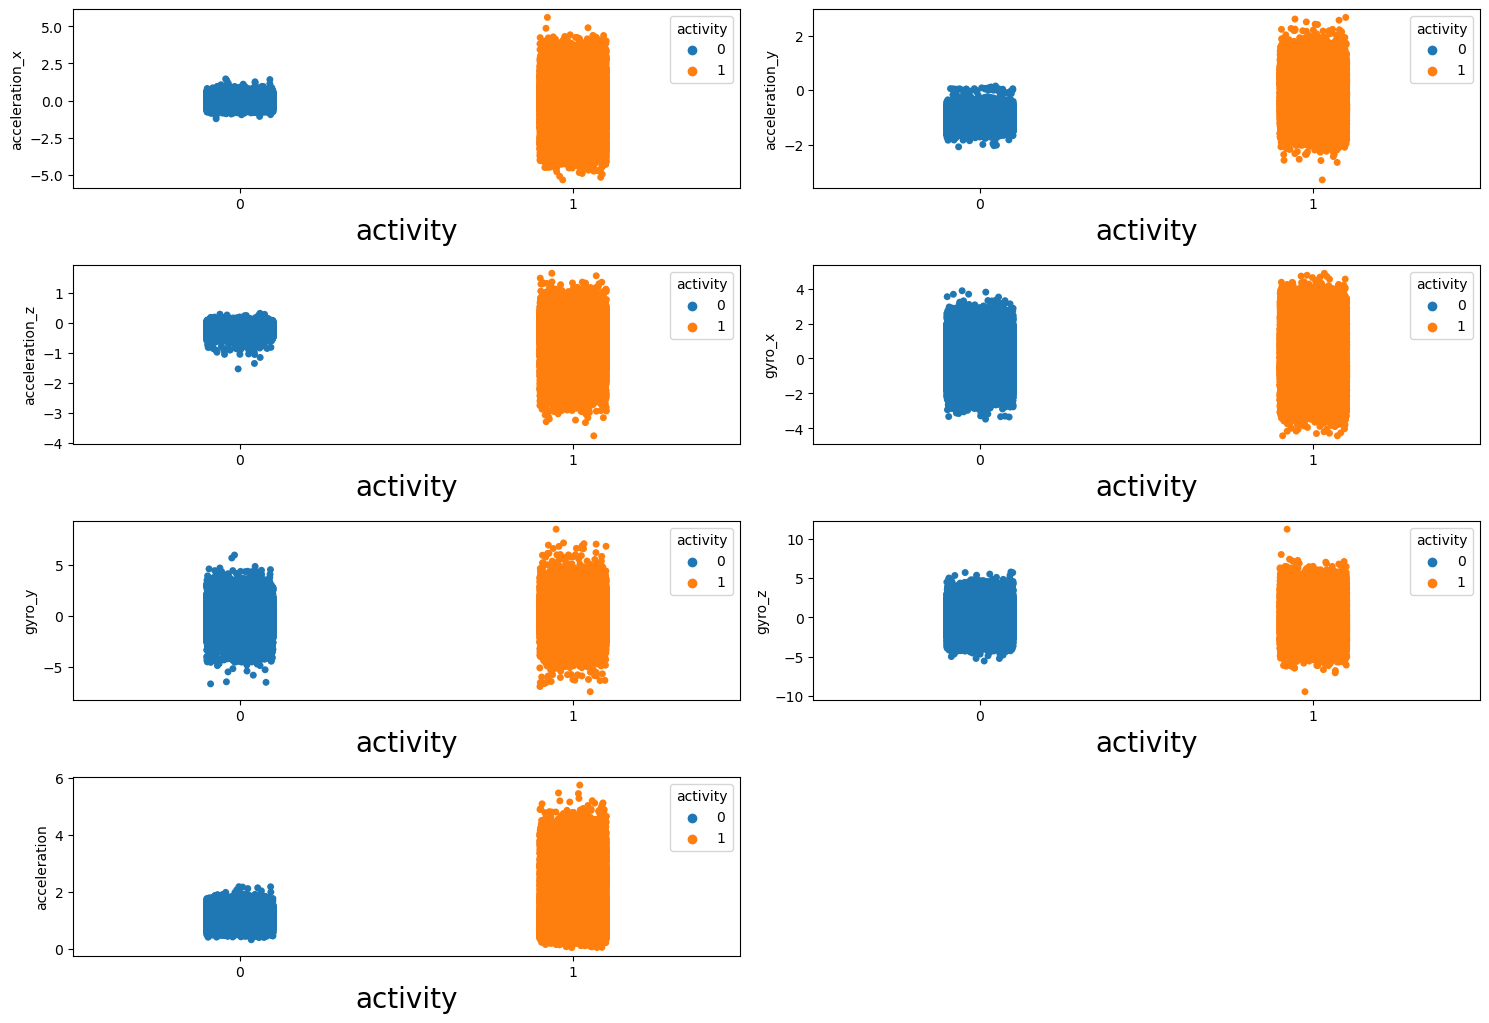

In [40]:
box=data[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','acceleration']]
plt.figure(figsize=(15,20), facecolor='white')

plotnumber = 1

for column in box:
    if plotnumber<=8 :
        ax = plt.subplot(8,2,plotnumber)
        sns.stripplot(x='activity', y=box[column], hue=data.activity, data=data)
        plt.xlabel("activity",fontsize=20)
        plt.tight_layout()
    plotnumber+=1
plt.show()

# Outlier Treatment:-

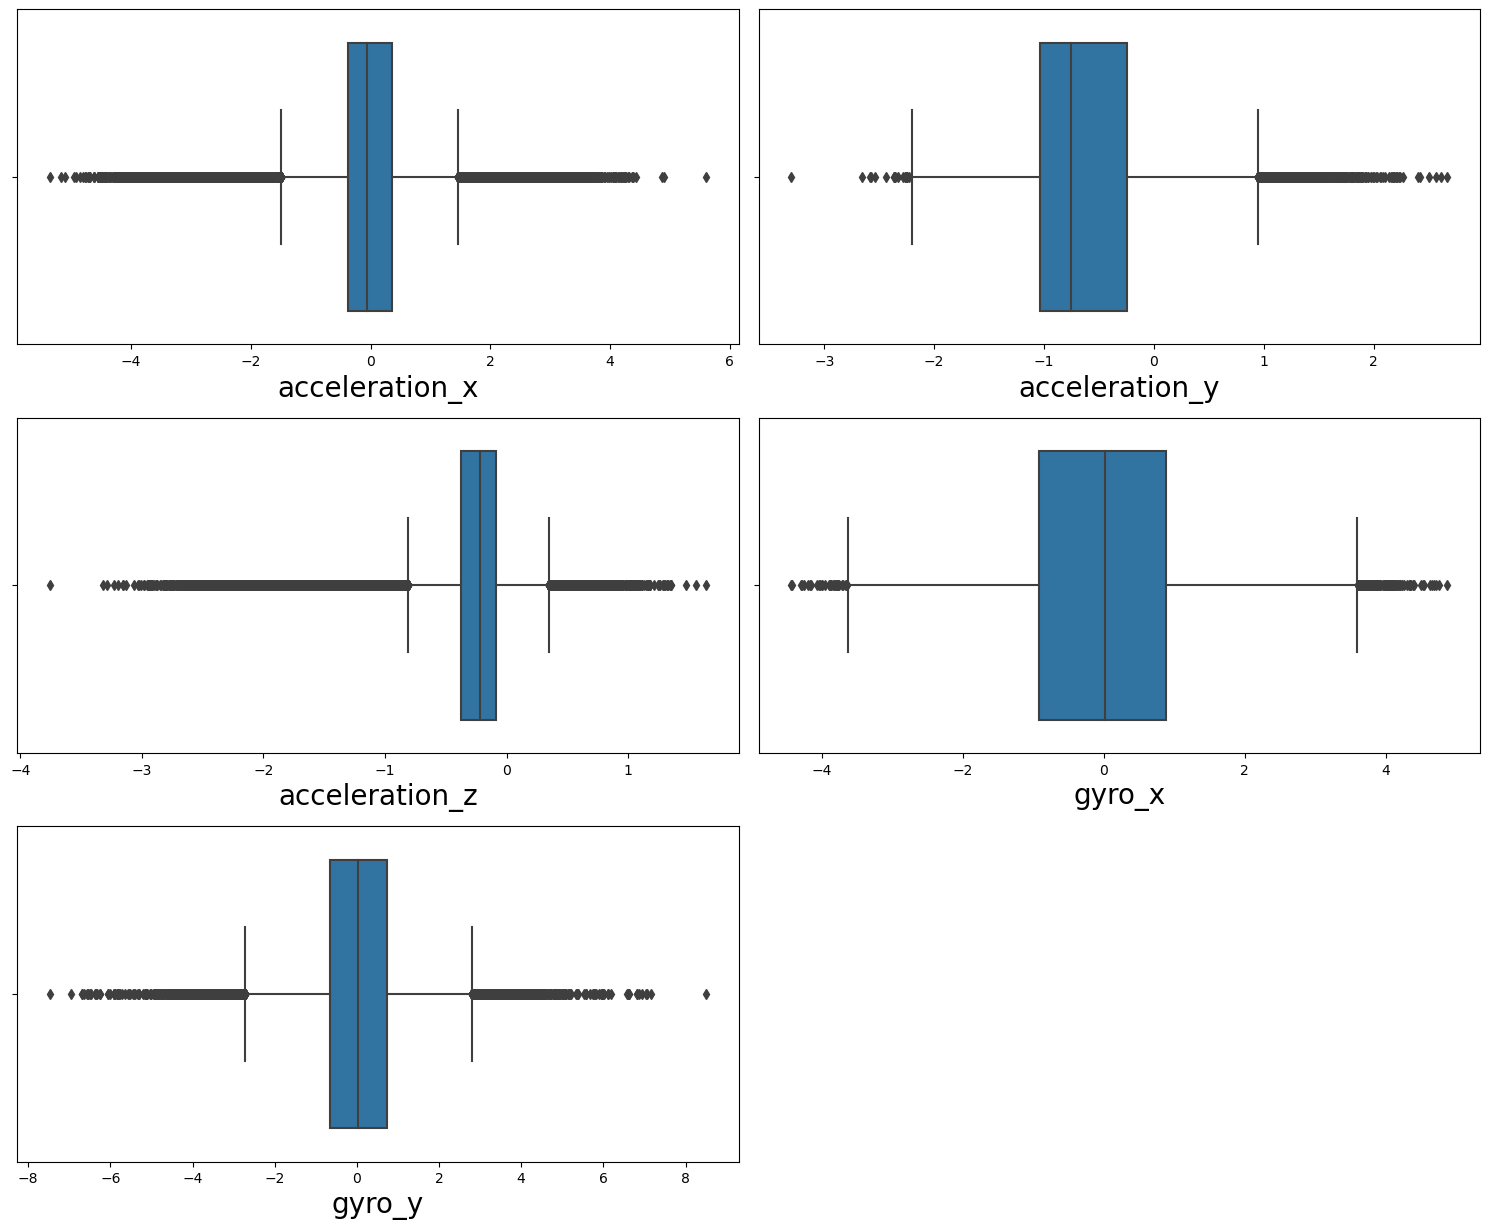

In [41]:
box=data[['acceleration_x','acceleration_y','acceleration_z', 'gyro_x','gyro_y','gyro_z']]
plt.figure(figsize=(15,20), facecolor='white')

plotnumber = 1

for column in box:
    if plotnumber<=5 :
        ax = plt.subplot(5,2,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### There are outliers in almost all the featurs. Certain models like Logistic regression models, are highly influenced by outliers. So it is better to treat the outlier before using this model,or use a different model where outlier treatment is not necessary eg. Decision tree.in this case there are so many outliers ,in that case it should not be considered as outliers but valid data.

# Feature Selection:-

#### Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

<Axes: >

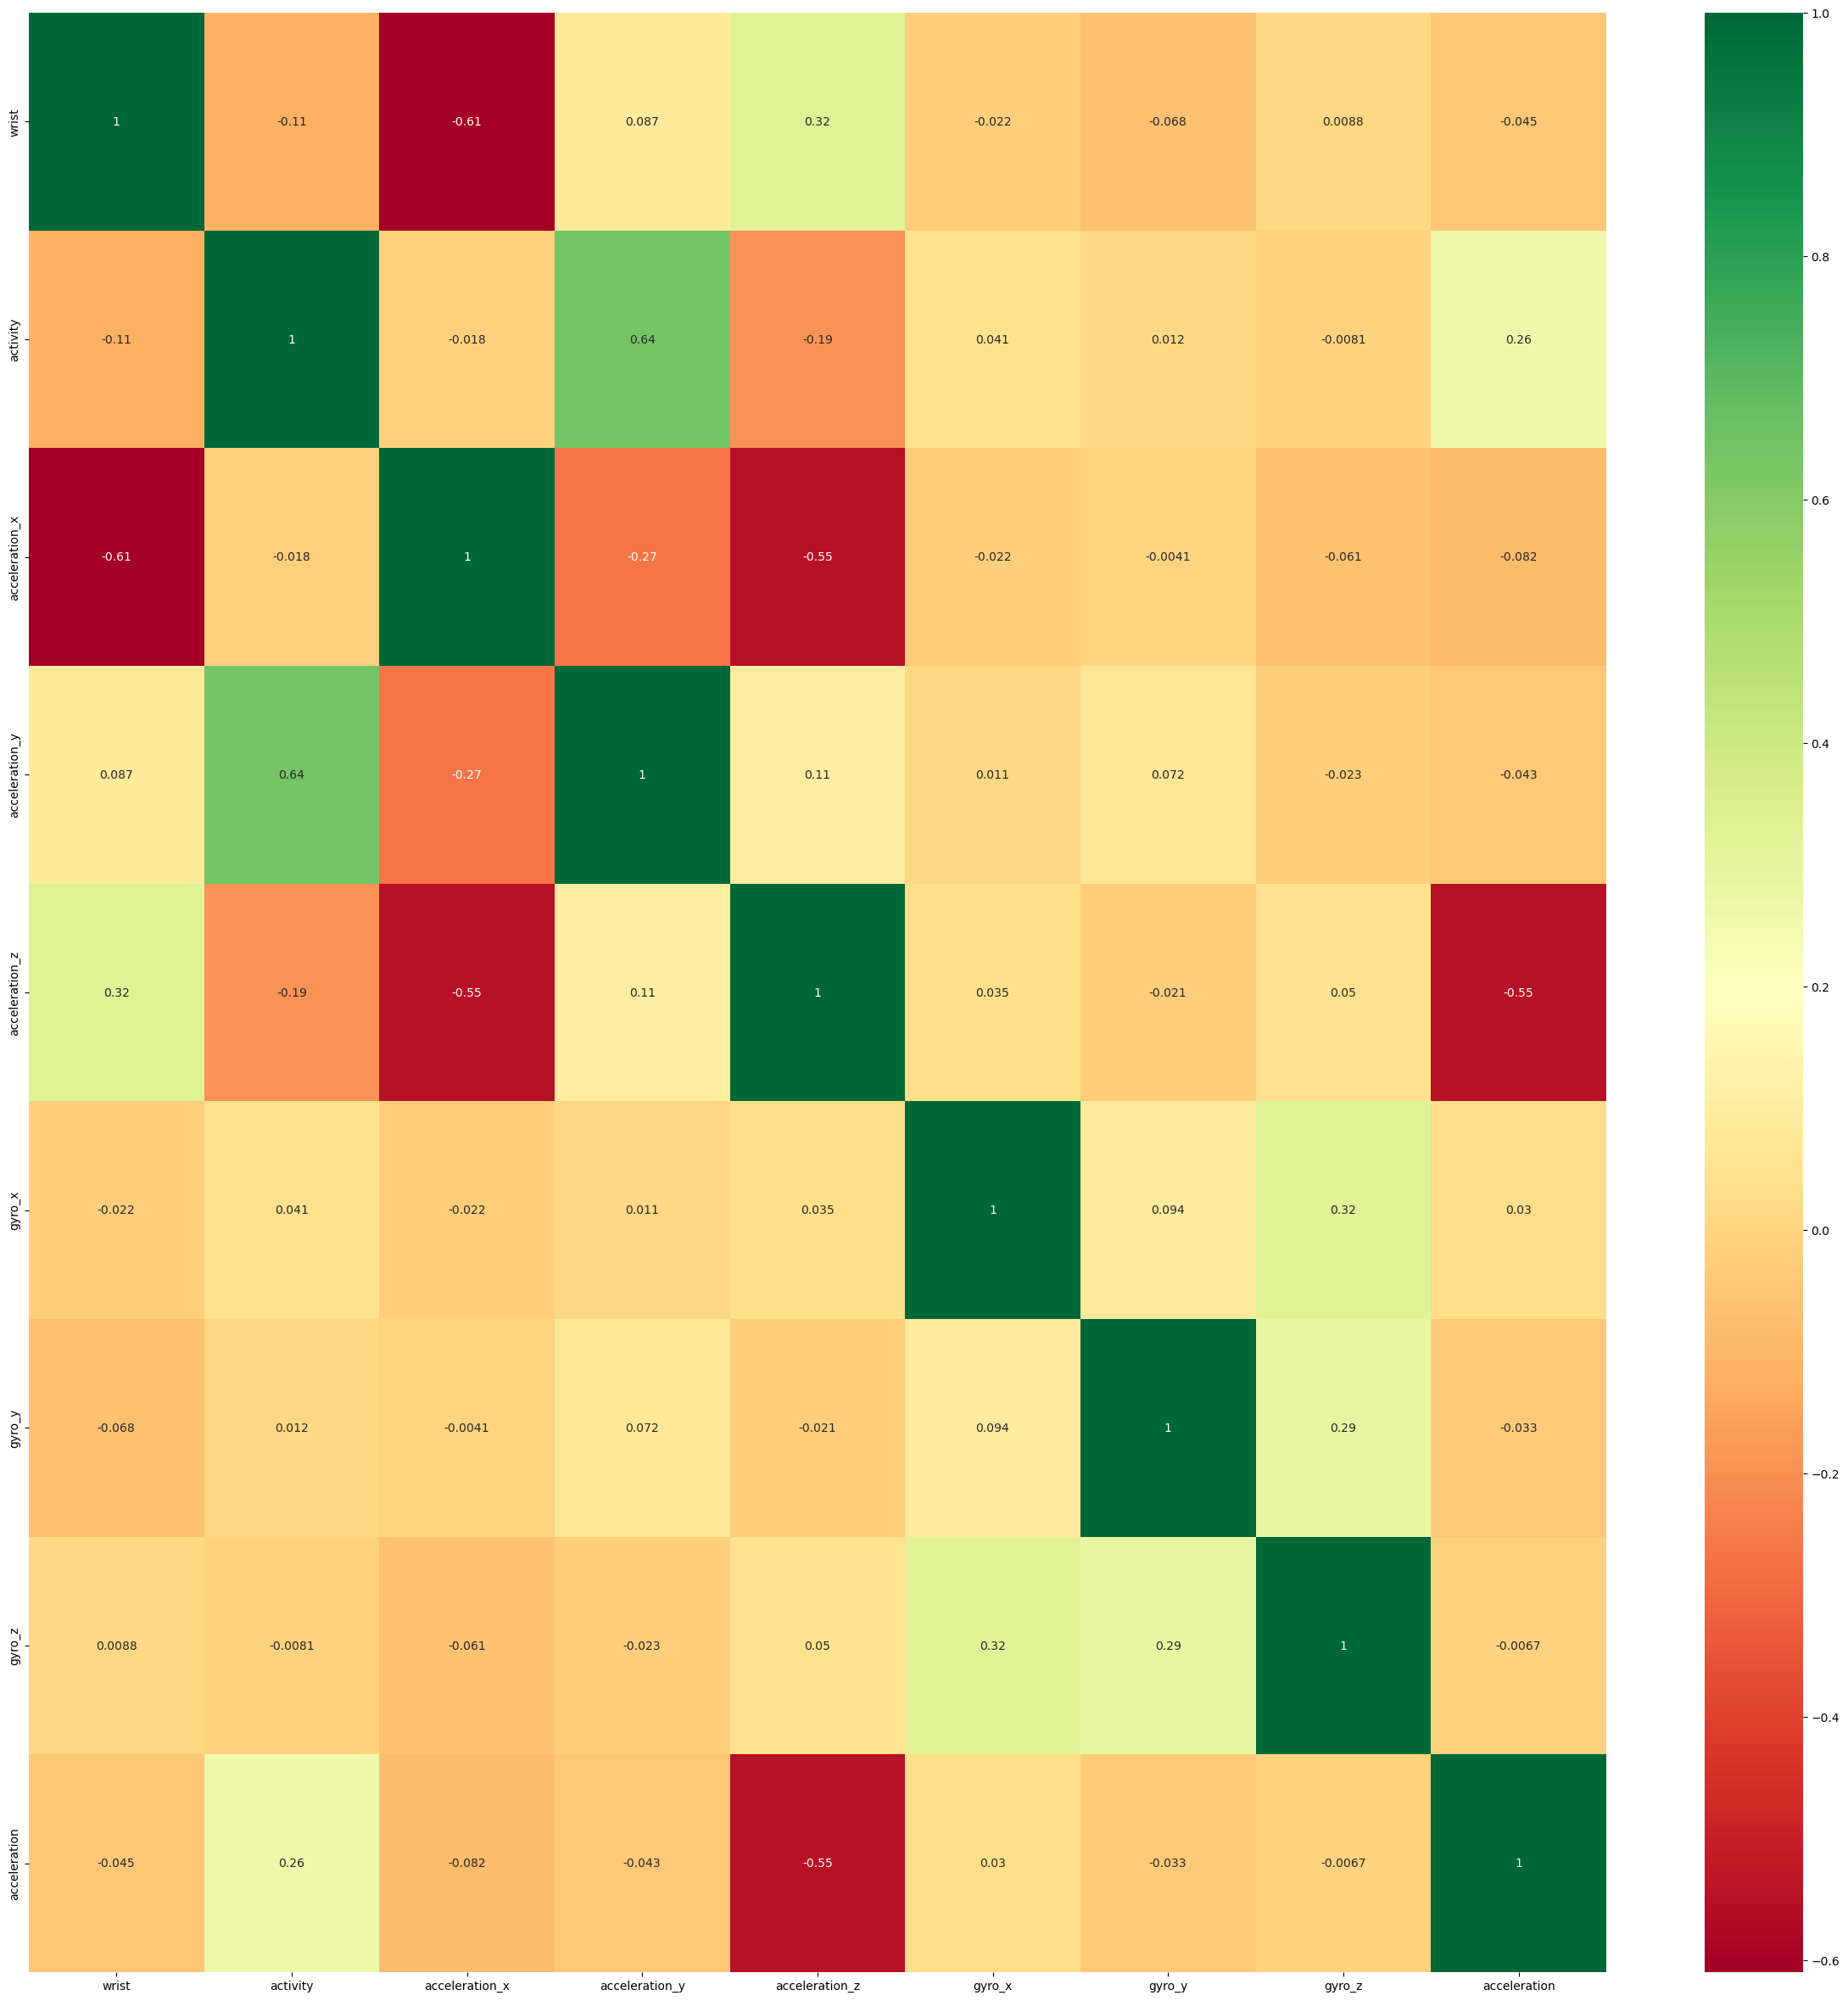

In [42]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

#### Here we check the Correlation.There is no high correlation so,it is not wise to remove any features.

# Model Creation:-

## Logistic Regression:-


#### Logistic regression is a statistical method used for binary classification. It models the relationship between input features and a binary outcome, estimating probabilities and making predictions in various fields, including machine learning and epidemiology.`

In [43]:
X = data.drop(columns = ['activity','acceleration','username'])
y = data['activity']

#### Here we do model creation.

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.30,random_state=42)

#### This function is used to split a dataset into two subsets: a training set and a test set. The training set is used to train the machine learning model, while the test set is used to evaluate the model's performance.

#### In our code, the X and y variables are the features and labels of the dataset, respectively. The test_size parameter specifies the proportion of the dataset that should be used for the test set. In this case, you have specified test_size = 0.30, which means that 30% of the dataset will be used for the test set. The random_state parameter is used to ensure that the results of the split are reproducible.

#### Now we  split the training and testing data.

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

#### We have created an instance of the LogisticRegression class called log_reg. We have then called the fit() method on the log_reg object to train the model on the training set data (X_train and y_train).
#### The fit() method takes two arguments:
#### X: The training set features.
#### y: The training set labels.
#### The fit() method will train the model on the training set data and learn the relationship between the features and the labels.
#### Once the model is trained, you can use it to make predictions on new data.

In [46]:
y_pred = log_reg.predict(X_test)

#### The code is a call to the predict() method on the log_reg object. This method will make predictions on the test set data (X_test).

In [47]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8633404823719758


#### The Logistic Regression shows 86.33% accuracy

In [48]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.8998913679284699

#### The precision of a classification model is the fraction of the positive predictions that are actually positive. In other words, it is the percentage of the time that the model correctly predicts the positive class label for a data point that actually belongs to the positive class.

In [49]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall


0.8156479587972431

#### The recall of a classification model is the fraction of the positive instances that are correctly identified. In other words, it is the percentage of the time that the model correctly predicts the positive class label for a data point that actually belongs to the positive class.

In [50]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)
F1_Score

0.8557012316249504

#### The F1 score is a measure of a model's accuracy that takes both precision and recall into account. It is calculated as the harmonic mean of precision and recall.

In [51]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8630355840045734

#### The AUC is a measure of the overall performance of a binary classification model. It is calculated as the area under the ROC curve, which is a graphical plot of the true positive rate (TPR) against the false positive rate (FPR). The TPR is the percentage of positive instances that are correctly classified, while the FPR is the percentage of negative instances that are incorrectly classified.

In [52]:
pd.crosstab(y_test, y_pred)

col_0,0,1
activity,,
0,12176,1198
1,2434,10769


#### The crosstab() function returns a Pandas DataFrame object. The DataFrame will have two columns: the first column will contain the true labels, and the second column will contain the predicted labels. The rows of the DataFrame will correspond to the unique values in the true labels column.

In [53]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     13374
           1       0.90      0.82      0.86     13203

    accuracy                           0.86     26577
   macro avg       0.87      0.86      0.86     26577
weighted avg       0.87      0.86      0.86     26577



#### The classification_report() function returns a string containing a table of metrics that summarize the performance of the model. The metrics include:

#### Accuracy: The fraction of the predictions that are correct.
#### Precision: The fraction of the positive predictions that are actually positive.
#### Recall: The fraction of the positive instances that are correctly identified.
#### F1 score: A measure of a model's accuracy that takes both precision and recall into account.
#### Support: The number of instances in the true label set.

In [54]:
fpr,tpr,threshold=roc_curve(y_test, y_pred)

#### The fpr is the percentage of negative instances that are incorrectly classified as positive. The tpr is the percentage of positive instances that are correctly classified as positive. The threshold is a value that is used to decide whether an instance is classified as positive or negative

In [55]:
print (threshold)

[2 1 0]


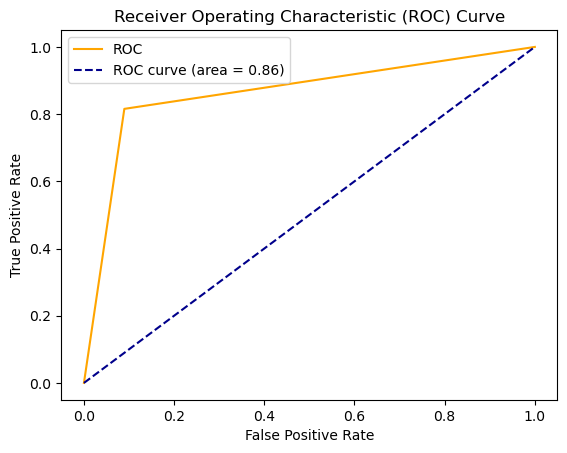

In [56]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

tpr  [0.         0.81564796 1.        ]
fpr  [0.         0.08957679 1.        ]
thresholds  [2 1 0]
roc_auc_score 0.8630355840045734
Threshold value is: 1


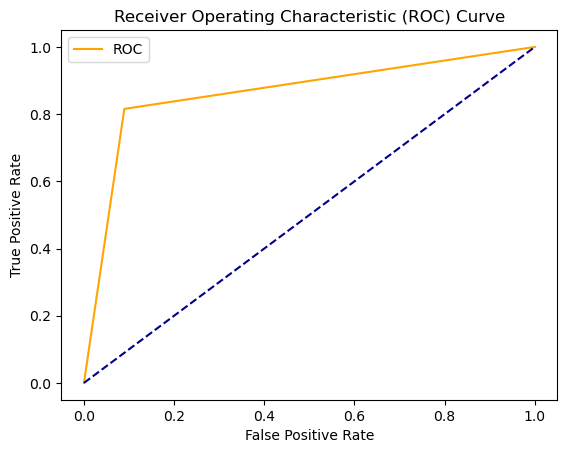

In [57]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("tpr ",tpr)
print("fpr ",fpr)
print("thresholds ",thresholds)
print("roc_auc_score" ,roc_auc_score(y_test, y_pred))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

## Improvement in  Logistic Regression with added feature "acceleration"

In [58]:
## Model Creation
X1 = data.drop(columns = ['activity','username'])
y = data['activity']

In [59]:
## Spliting training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.30,random_state=42)

In [60]:
## Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [61]:
y_pred = log_reg.predict(X_test)

In [62]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8633404823719758


#### The improved Logistic Regression shows 86.33%

In [63]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.8998913679284699

In [64]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall


0.8156479587972431

In [65]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)
F1_Score

0.8557012316249504

In [66]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.8630355840045734

In [67]:
pd.crosstab(y_test, y_pred)

col_0,0,1
activity,,
0,12176,1198
1,2434,10769


#### The accuracy has increased drastically but there is misclassification on running ,some values are showing as running but is actually walking. This model will not be feasible.

## Decision Tree:-

#### A decision tree is a graphical representation of decision-making processes. It's a popular algorithm in machine learning for classification and regression tasks, breaking down data into hierarchical choices.

In [68]:
# preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_hat=dt.predict(X_test)

#### The dt.fit() method is used to train the decision tree classifier model on the training set (X_train and y_train).

#### The dt.predict() method is then used to make predictions on the test set (X_test). The predictions are stored in the variable y_hat.

#### The decision tree classifier model is a supervised learning algorithm that can be used to classify data. The model works by creating a tree-like structure of decisions. Each decision is based on a single feature of the data. The model predicts the class label for an instance by traversing the tree and following the branches until it reaches a leaf node.

In [70]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
##Training score
y_train_predict=dt.predict(X_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

#### The above code creates a variable called y_train_predict that stores the predictions made by the decision tree classifier model on the training set.

#### The code then calculates the accuracy score of the model on the training set by calling the accuracy_score() function and passing the true labels (y_train) and the predicted labels (y_train_predict) as arguments.

#### The accuracy score is a measure of the fraction of instances that are correctly classified. A perfect model will have an accuracy score of 1.0, while a random model will have an accuracy score of 0.5.

In [71]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33061
           1       1.00      1.00      1.00     33380

    accuracy                           1.00     66441
   macro avg       1.00      1.00      1.00     66441
weighted avg       1.00      1.00      1.00     66441



In [72]:
## test acc
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.9852801733869148

In [73]:
## test score
test_f1=f1_score(y_test,y_hat)
test_f1

0.9851804709519049

In [74]:
pd.crosstab(y_test,y_hat)

col_0,0,1
activity,,
0,10985,177
1,149,10836


## Hyperparameter  Tuning for  DecisionTree

In [75]:
from sklearn.model_selection import GridSearchCV

#### Grid search cross-validation is a technique for hyperparameter tuning that involves searching over a grid of hyperparameter values and selecting the hyperparameters that result in the best model performance.

In [76]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


#### The params dictionary defines the hyperparameters to search over. The criterion hyperparameter specifies the splitting criterion to use. The splitter hyperparameter specifies the splitting algorithm to use. The max_depth hyperparameter specifies the maximum depth of the tree. The min_samples_split hyperparameter specifies the minimum number of samples required to split a node. The min_samples_leaf hyperparameter specifies the minimum number of samples required in a leaf node.

#### The tree_clf variable creates a decision tree classifier model with the default hyperparameters. The tree_cv variable creates a GridSearchCV object that will use the tree_clf model and the params dictionary to perform grid search cross-validation. The n_jobs=-1 argument tells the GridSearchCV object to use all available cores for the computation. The verbose=1 argument tells the GridSearchCV object to print progress information. The cv=3 argument tells the GridSearchCV object to use 3 folds for cross-validation.

#### The tree_cv.fit() method fits the model on the training set and evaluates the model performance on the cross-validation folds. The tree_cv.best_params_ attribute stores the best hyperparameters found by the grid search.

#### The code prints the best hyperparameters found by the grid search. In this case, the best hyperparameters are criterion="entropy", splitter="best", max_depth=18, min_samples_split=2, and min_samples_leaf=3.

In [77]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [78]:
tree_cv.best_score_

0.985996272979218

#### The best score is the average F1 score of the model on the cross-validation folds.

#### In this case, the best score is 0.98. This means that the decision tree classifier model with the best parameters has an average F1 score of 98% on the cross-validation folds.

#### The F1 score is a measure of the accuracy and precision of a model. It is calculated by taking the harmonic mean of the accuracy and precision scores. The accuracy score is the fraction of instances that are correctly classified. The precision score is the fraction of positive predictions that are actually positive.

In [79]:
#add the new best parameters
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=2,min_samples_split=2,splitter='random')

In [80]:
 dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       splitter='random')

#### The above code will fit the decision tree classifier model dt1 on the training set. The model will learn the relationship between the features(X) and the labels(y).Once the model is trained, it can be used to make predictions on new data.

In [81]:
 y_hat1=dt1.predict(X_test)

#### The predict() method will make predictions for the instances in the test set. The predictions will be stored in the variable y_hat1.

#### The predictions can be used to evaluate the performance of the model on the test set.

In [82]:
 print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11162
           1       0.98      0.93      0.95     10985

    accuracy                           0.95     22147
   macro avg       0.96      0.95      0.95     22147
weighted avg       0.96      0.95      0.95     22147



## Random Forest:-

#### Random Forest is an ensemble learning technique that combines multiple decision trees to improve accuracy and mitigate overfitting. It's widely used for classification, regression, and feature selection tasks in machine learning.

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)


RandomForestClassifier()

#### The above code creates an instance of the RandomForestClassifier class and assigns it to the variable rf_clf. The n_estimators parameter is set to 100, which means that the model will create 100 decision trees.The more trees that are created, the more accurate the model will be, but it will also take longer to train the model.

#### The fit() method is then used to train the random forest classifier model on the training set (X_train and y_train).

In [84]:
y_predict=rf_clf.predict(X_test)

#### The predict() method will make predictions for the instances in the test set using the random forest classifier model rf_clf. The predictions will be stored in the variable y_predict.

In [85]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11162
           1       0.99      0.99      0.99     10985

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147



#### The classification report includes the following metrics:

#### Precision: The precision is the fraction of positive predictions that are actually positive.
#### Recall: The recall is the fraction of positive instances that are correctly classified.
#### F1 score: The F1 score is the harmonic mean of the precision and recall scores.
#### Support: The support is the number of instances in the test set for each class.
#### The higher the values of the precision, recall, and F1 score, the better the performance of the model.

In [86]:
confusion_matrix(y_test,y_predict)

array([[11074,    88],
       [   78, 10907]], dtype=int64)

#### The confusion matrix is a table that summarizes the predictions of the model compared to the actual labels.

#### The confusion matrix includes the following information:

#### True positives: The number of instances that were correctly classified as positive.
#### False positives: The number of instances that were incorrectly classified as positive.
#### True negatives: The number of instances that were correctly classified as negative.
#### False negatives: The number of instances that were incorrectly classified as negative.
#### The higher the values of the true positives and true negatives, the better the performance of the model.

In [87]:
f_Score=f1_score(y_test,y_predict)
f_Score

0.9924476797088262

#### The above code will calculate the F1 score for the random forest classifier model. The F1 score is a measure of the accuracy and precision of the model.In this case, the F1 score is 0.99. This means that the random forest classifier model has a good performance on the test set. The precision and recall scores are also high, which indicates that the model is not overfitting the training set.

## Recurrent Neural Network (RNN) :-

#### A Recurrent Neural Network (RNN) is a type of neural network designed for sequence data. It processes information with loops to capture temporal dependencies, making it suitable for tasks like natural language processing and time series analysis.

In [92]:
# Creating the model

def create_baseline():
    model = keras.Sequential(
    [
        layers.Dense(14, input_shape = (None,7), activation="relu"), ##?
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1,  activation="sigmoid"),
    ]
    )
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#### The above code defines a function called create_baseline() that creates a sequential model with 5 hidden layers. The first layer has 14 neurons and uses the relu activation function. The next 3 layers have 20, 10, and 5 neurons, respectively, and also use the relu activation function. The last layer has 1 neuron and uses the sigmoid activation function.
#### The keras.Sequential() function is used to create a sequential model. A sequential model is a linear stack of layers.

#### The layers.Dense() function is used to create a dense layer. A dense layer is a layer that connects all neurons in the previous layer to all neurons in the next layer.

#### The model is compiled using the loss='binary_crossentropy' loss function, the optimizer='adam' optimizer, and the metrics=['accuracy'] metrics.

#### The create_baseline() function returns the model.

#### The input shape of the model is specified as (None, 7). This means that the model can accept any number of instances, but each instance must have 7 features.

#### The None in the input shape represents the batch size. The batch size is the number of instances that are processed by the model at the same time. The batch size can be changed to improve the performance of the model.

In [93]:
# Initializing the model
model_RNN = create_baseline()

In [94]:
# Checking the model summary
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 14)          112       
                                                                 
 dense_1 (Dense)             (None, None, 20)          300       
                                                                 
 dense_2 (Dense)             (None, None, 10)          210       
                                                                 
 dense_3 (Dense)             (None, None, 5)           55        
                                                                 
 dense_4 (Dense)             (None, None, 1)           6         
                                                                 
Total params: 683 (2.67 KB)
Trainable params: 683 (2.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### The summary includes the following information:-the number of layers in the model,the number of neurons in each layer,the activation function for each layer,the input shape of the model,the output shape of the model.
#### The summary can be used to understand the structure of the model and to get an idea of the number of parameters that the model has.





In [95]:
# Training the model
model_RNN.fit(X_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
520/520 [==============================] - 4s 3ms/step - loss: 0.2008 - accuracy: 0.9201
Epoch 2/15
520/520 [==============================] - 2s 3ms/step - loss: 0.0421 - accuracy: 0.9868
Epoch 3/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0341 - accuracy: 0.9888
Epoch 4/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9898
Epoch 5/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9903
Epoch 6/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0283 - accuracy: 0.9906
Epoch 7/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 8/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9911
Epoch 9/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9914
Epoch 10/15
520/520 [==============================] - 1s 3ms/step - loss: 0.0258 - accuracy: 0.9915

#### The above code will train the model on the training set. The fit() method takes the following arguments:
#### X_train: The training data.
#### y_train: The training labels.
#### batch_size: The number of instances that are processed by the model at the same time.
#### epochs: The number of times the model will be trained on the training data.

#### The model will be trained for 15 epochs. Each epoch consists of the following steps:
#### The model will make predictions for the training data.
#### The model will calculate the loss for the predictions.
#### The model will update its parameters to minimize the loss.
#### The fit() method will stop training when the model has converged or when the maximum number of epochs has been reached.

##### Accuracy with RNN is 99.17%

## Artifical Neural Network (ANN) :-

#### An Artificial Neural Network (ANN) is a computational model inspired by the human brain's structure. It processes data through interconnected nodes, learning patterns and solving complex problems in machine learning.

In [96]:
# Initializing 

model = MLPClassifier()

# Training

model.fit(X_train,y_train)

# Predicting

y_predict=model.predict(X_test)

# Testing

accuracy_score(y_test,y_predict)

0.9933173793290287

#### The MLPClassifier() class is a class from the scikit-learn library that can be used to create a multi-layer perceptron (MLP) classifier model. The MLP classifier model is a type of neural network that can be used for classification tasks.
#### A MLP is a type of ANN that has at least one hidden layer between the input layer and the output layer. The hidden layer allows the MLP to learn more complex relationships between the input and output variables.

#### MLP networks are commonly used for classification and regression tasks. They can also be used for other tasks such as natural language processing and image recognition.
#### The fit() method trains the model on the training set. The predict() method makes predictions on the test set. The accuracy_score() method calculates the accuracy score on the test set.

### Accuracy with ANN is 99.3%
### ANN gives better scores compared to RNN.

# Conclusion:-

### After creating all the models we found that ANN i.e, Artifical Neural Network gives the best results with 99.30% as compared to other models. All other model have comparitively less F1 score and Accuracy score.